## Exercise 0: Dataset Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


d2 = pd.read_csv('Downloads/winequality-red.csv',  delimiter=";") #Read the required csv file and store it
d2 = d2.dropna()
d2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
#Generating a sample dataset with given mean and standard deviation

x_d1 = np.random.uniform(low= 0.0866,high = 1.0866,size = (100,1)) #generating x matrix
x_dl = x_d1.sort(axis=0) # doing sorting so that it can be plotted better
phi = np.random.rand(100,1)

func = lambda x , phi: 1.3*(x**2) + 4.8*x + 8 + phi  # generating y according to the function given

y_d1 = func(x_d1,phi)

#print(x_d1)

## Exercise 1: Generalized Linear Models with Scikit Learn

In [3]:
# preproccessing the data frame

d2 = d2.apply(lambda x: x.sample(frac=1, random_state = 3116)) #seed
y_wine = np.array(d2[['quality']])  # removing target from data frame
x_wine = np.array(d2.drop(['quality'],axis =1))

#Normalization
mean = x_wine.mean()

sd = x_wine.std()

print(mean,sd)
x_wine = (x_wine - mean)/sd
x_wine.shape



8.134219224515322 16.726533979432844


(1599, 11)

In [4]:
# Splitting into 80:20 for train and test data sets


x_train = x_wine[:int(0.8*len(x_wine)),]
y_train = y_wine[:int(0.8*len(x_wine)),]

x_test = x_wine[int(0.8*len(x_wine)):,]
y_test = y_wine[int(0.8*len(x_wine)):,]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1279, 11)
(1279, 1)
(320, 11)
(320, 1)


#### Ordinary Least Squares Model for Linear Regression
    Using Stochastic Gradient Descent. In this model we consider learning rate as the hyper parameter

In [5]:
rmse_train = []
rmse_test = []
def model_OLS(x_train,y_train,x_test,y_test,lr,l1,l2):
        reg = SGDRegressor( penalty='none', max_iter=1000,learning_rate='constant', eta0=lr) # lr - learning rate
        reg1 = reg.fit(x_train,y_train.ravel()) # fitting the model
        y_predicted_test = reg1.predict(x_test) # finding y for the test and train data set
        y_predicted_train = reg1.predict(x_train)

        #print(y_predicted_train)
        
        # Rmse found for test and train data set using sklearn function
        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_predicted_train))) #appending to list
        rmse_test.append(np.sqrt(mean_squared_error(y_test, y_predicted_test)))
        
        return rmse_train,rmse_test

In [6]:
# Calling the OLS model for 3 learning rate values 
model_OLS(x_train,y_train,x_test,y_test,0.01,1,1)
model_OLS(x_train,y_train,x_test,y_test,0.02,1,1)
rmse_train,rmse_test = model_OLS(x_train,y_train,x_test,y_test,0.03,1,1)

print(rmse_train)
print(rmse_test)

[0.7001113171037422, 0.6890986305411888, 0.7235060414445141]
[0.6980205022308806, 0.699799284336053, 0.7411811818345894]


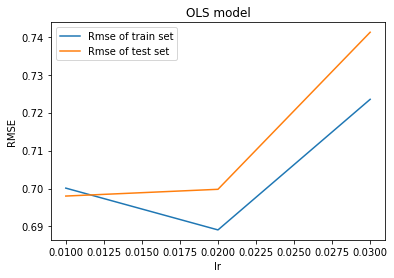

In [7]:
#Plotting the RMSE values of train and test data sets for each hyperparameter value
plt.title("OLS model")
plt.xlabel("lr")
plt.ylabel("RMSE")

plt.plot([0.01,0.02,0.03],rmse_train, label ="Rmse of train set")
plt.plot([0.01,0.02,0.03],rmse_test, label ="Rmse of test set")
plt.legend()

We observe that the rmse value of the test set is higher than that of the train set. Also the error decreases and increases as lr increases. 

#### Ridge regression model ( L2 regularization)
    Using Stochastic Gradient Descent. In this model we consider the lambda value as the hyper parameter

In [8]:
rmse_train = []
rmse_test = []
def model_Ridge(x_train,y_train,x_test,y_test,lr,l2):
        reg = SGDRegressor( penalty='l2', max_iter=1500,learning_rate='optimal', alpha=l2 ) #l2 regularization is specified
        reg1 = reg.fit(x_train,y_train.ravel())    # the model is fitted to the data
        y_predicted_test = reg1.predict(x_test)    # y values are predicted for test and train set
        y_predicted_train = reg1.predict(x_train)

        
        
        #Root mean square error is found using sklearn functions
        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_predicted_train))) #appended to list
        rmse_test.append(np.sqrt(mean_squared_error(y_test, y_predicted_test)))
        
        return rmse_train,rmse_test

In [9]:
#The Ridge Regression function is called for 3 sets of hyper parameters 

model_Ridge(x_train,y_train,x_test,y_test,0.01,1)
model_Ridge(x_train,y_train,x_test,y_test,0.02,0.1)
rmse_train,rmse_test = model_Ridge(x_train,y_train,x_test,y_test,0.03,0.001)

print(rmse_train)
print(rmse_test)

[0.8649418072205164, 14974887.754206432, 23669710.11060567]
[0.8387112617989245, 15423712.207425298, 27166199.144323796]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


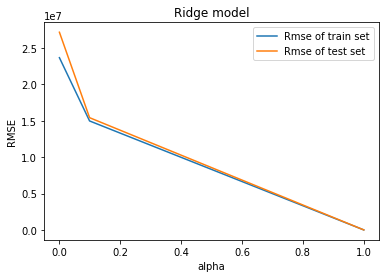

In [10]:
#Plotting the RMSE values of each hyper parameter for train and test data sets

plt.title("Ridge model")
plt.xlabel("alpha")
plt.ylabel("RMSE")

plt.plot([1,0.1,0.001],rmse_train, label ="Rmse of train set")
plt.plot([1,0.1,0.001],rmse_test, label ="Rmse of test set")
plt.legend()

We observe that the rmse value of the test set is only slightly higher than that of the train set. Also the error decreases  as alpha increases. From the considered values, we can say that error decreases sharply in the beginning (1.5 to 1.0) and then there is a smooth change.Also as alpha increases the error difference between test and train set decreases.

#### Lasso regression model ( L1 regularization)
    Using Stochastic Gradient Descent. In this model we consider the lambda value as the hyper parameter

In [11]:
rmse_train = []
rmse_test = []
def model_Lasso(x_train,y_train,x_test,y_test,lr,l1):
        reg = SGDRegressor( penalty='l1', max_iter=1500,learning_rate='optimal', alpha=l1 ) # l1 regularisation
        reg1 = reg.fit(x_train,y_train.ravel()) # model fitted to x and y
        y_predicted_test = reg1.predict(x_test) # y values predicted for test and train set
        y_predicted_train = reg1.predict(x_train)

        
        
        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_predicted_train)))# Rmse calculated and appended
        rmse_test.append(np.sqrt(mean_squared_error(y_test, y_predicted_test)))
        
        return rmse_train,rmse_test

In [12]:
#The Lasso Regression model is called for 3 sets of hyper parameters

model_Lasso(x_train,y_train,x_test,y_test,0.01,1)
model_Lasso(x_train,y_train,x_test,y_test,0.02,0.1)
rmse_train,rmse_test = model_Lasso(x_train,y_train,x_test,y_test,0.03,0.001)

print(rmse_train)
print(rmse_test)

[0.8122649009555092, 2338645921.0637355, 14777471882.372028]
[0.7881690931122354, 2397176436.5721, 15954638304.12801]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


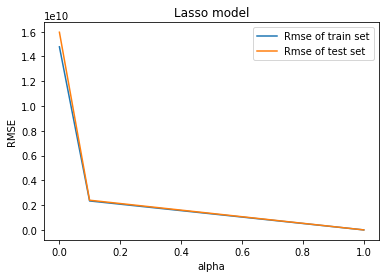

In [13]:
#Plotting the RMSE values of each hyper parameter for train and test data sets

plt.title("Lasso model")
plt.xlabel("alpha")
plt.ylabel("RMSE")

plt.plot([1,0.1,0.001],rmse_train, label ="Rmse of train set")
plt.plot([1,0.1,0.001],rmse_test, label ="Rmse of test set")
plt.legend()

We observe that the rmse value of the test set is only slightly higher than that of the train set. Also the error decreases  as alpha increases. From the considered values, we can say that error decreases sharply in the beginning (0.2) and then there is a smooth change.Also as alpha increases the error difference between test and train set decreases.

We can also observe that compared to L1, the L2 reaches lower error faster( closer to 0 ). 

Through these graphs we observe that as studied in the lectures, the difference between rmse of test and train data sets is reduced when we use regularisation. Thus it avoids underfitting and overfitting of models.

### Tuning the hyperparameters using scikit learn GridSearchCV for each model

#### Hyper parameter tuning for OLS model - 
    Here learning rate is taken as hyper parameter. The parameters are specified beforehand and passed to the gridSearchCV function along with the Regression model.

In [14]:
ols_params = {'eta0' : np.linspace(0.001, 0.1, num=5)} # lr list specified
ols = GridSearchCV(SGDRegressor( penalty='none', max_iter=1000),ols_params) # implementing gridsearch

ols = ols.fit(x_train,y_train.ravel()) # fitted with data
ols.cv_results_ # results of the hyperparameter tuning - all info like params taken,
#scores for each param etc can be found

{'mean_fit_time': array([0.00352502, 0.00272341, 0.00251579, 0.0027523 , 0.00187025]),
 'std_fit_time': array([0.00015962, 0.00073892, 0.00027315, 0.0004056 , 0.00042036]),
 'mean_score_time': array([0.00025525, 0.00017757, 0.00015259, 0.00017548, 0.0001811 ]),
 'std_score_time': array([8.34920759e-05, 4.05836887e-05, 5.73593679e-06, 3.95941412e-05,
        3.35459601e-05]),
 'param_eta0': masked_array(data=[0.001, 0.025750000000000002, 0.0505,
                    0.07525000000000001, 0.1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'eta0': 0.001},
  {'eta0': 0.025750000000000002},
  {'eta0': 0.0505},
  {'eta0': 0.07525000000000001},
  {'eta0': 0.1}],
 'split0_test_score': array([0.0406312 , 0.19649381, 0.2116367 , 0.25671878, 0.24797304]),
 'split1_test_score': array([0.0385847 , 0.11076453, 0.20273691, 0.22518818, 0.19028804]),
 'split2_test_score': array([0.03702353, 0.23786928, 0.29943097, 0.29518964, 0.3

In [15]:
ols.best_params_['eta0'] # Best parameter found

0.1

#### Hyper parameter tuning for Ridge model - 
    Here learning rate and lambda are taken as hyper parameters. The parameters are specified beforehand in a list format and passed to the gridSearchCV function along with the Regression model.

In [16]:
ridge_params = {'eta0' : np.linspace(0.001, 0.1, num=5),'alpha':np.linspace(0.001, 0.1, num=5)} # parameter list
ridge = GridSearchCV(SGDRegressor( penalty='l2', max_iter=1000),ridge_params) # Gridsearch function

ridge = ridge.fit(x_train,y_train.ravel()) # Fitting model with data
ridge.cv_results_

# All information regarding the model is given

{'mean_fit_time': array([0.00373173, 0.00266666, 0.00237699, 0.00253797, 0.00217338,
        0.00362978, 0.00135212, 0.0011282 , 0.00124817, 0.00125227,
        0.00368633, 0.00120621, 0.00102868, 0.00095048, 0.00107079,
        0.00396857, 0.00127673, 0.00116491, 0.00110559, 0.00117869,
        0.0041563 , 0.00129704, 0.0010839 , 0.00119143, 0.00101385]),
 'std_fit_time': array([9.04019621e-05, 4.51504876e-04, 4.57587367e-04, 5.37085380e-04,
        8.79411839e-04, 6.25901402e-05, 2.34957338e-04, 3.94657494e-04,
        2.64731530e-04, 3.38034856e-04, 7.20514358e-05, 2.25198402e-04,
        1.08903448e-04, 1.33590217e-04, 1.67866009e-04, 1.00419302e-04,
        1.65280591e-04, 2.24185131e-04, 3.08601678e-04, 7.65145213e-05,
        1.33689731e-04, 2.64755234e-04, 9.06502930e-05, 2.89481960e-04,
        2.51868917e-04]),
 'mean_score_time': array([0.00028801, 0.00017853, 0.00018125, 0.0001791 , 0.00015945,
        0.00016694, 0.00014815, 0.00014715, 0.00014734, 0.00014505,
        0.00

In [17]:
ridge.best_params_ # Best hyper parameters

{'alpha': 0.001, 'eta0': 0.1}

#### Hyper parameter tuning for LASSO model - 
    Here learning rate and lambda are taken as hyper parameters. The parameters are specified beforehand in a list format and passed to the gridSearchCV function along with the Regression model.

In [18]:
lasso_params = {'eta0' : np.linspace(0.001, 0.1, num=5),'alpha':np.linspace(0.001, 1, num=7)}#params
lasso = GridSearchCV(SGDRegressor( penalty='l1', max_iter=1000),lasso_params) # The penalty is specified as l1 

lasso = lasso.fit(x_train,y_train.ravel()) # Model fitted with data
lasso.cv_results_

# All information after tuning

{'mean_fit_time': array([0.00431347, 0.00318117, 0.00351543, 0.00301042, 0.00293002,
        0.00733199, 0.00126719, 0.00135627, 0.00137506, 0.00133719,
        0.01338806, 0.00104022, 0.0010602 , 0.00097375, 0.00108142,
        0.00986471, 0.00102057, 0.00099106, 0.00105004, 0.00107236,
        0.00854378, 0.00101275, 0.00097303, 0.00108709, 0.00101919,
        0.00783224, 0.00093703, 0.00093937, 0.00095801, 0.00110846,
        0.00746017, 0.00095062, 0.00093622, 0.0009294 , 0.00103693]),
 'std_fit_time': array([1.11495092e-04, 7.21173285e-05, 4.77202500e-04, 4.87318281e-04,
        4.68081814e-04, 6.02216082e-04, 1.15025537e-05, 3.90544496e-04,
        4.05223685e-04, 2.88554830e-04, 6.89204732e-05, 9.88790577e-07,
        1.27599824e-04, 8.56180205e-05, 1.46136112e-04, 5.45764240e-05,
        4.92140302e-05, 1.01371408e-04, 2.14058961e-04, 2.13842907e-04,
        9.20330798e-05, 6.73574303e-05, 5.11013726e-05, 2.51197643e-04,
        8.39416798e-05, 8.43219341e-05, 9.41363991e-06, 2

In [19]:
lasso.best_params_ # Best parameters

{'alpha': 0.001, 'eta0': 0.0505}

### Implementing Cross Validation with SGD for the best parameters
     On test and train data set to obtain the accuracy score and plot the same for each model

In [20]:
# Implementing cross validation for OLS model with best hyperparameters

ols_cross_val = cross_val_score(SGDRegressor( penalty='none', max_iter=1000,eta0=ols.best_params_['eta0']),x_train,y_train.ravel())
ols_cross_val_test = cross_val_score(SGDRegressor( penalty='none', max_iter=1000,eta0=ols.best_params_['eta0']),x_test,y_test.ravel())

print(ols_cross_val_test.mean())


0.05360360302305529


In [21]:
# Implementing cross validation for Ridge model with best hyperparameters

ridge_cross_val = cross_val_score(SGDRegressor( penalty='l2', max_iter=1000,eta0=ridge.best_params_['eta0'],alpha = ridge.best_params_['alpha']),x_train,y_train.ravel())
ridge_cross_val_test = cross_val_score(SGDRegressor( penalty='l2', max_iter=1000,eta0=ridge.best_params_['eta0'],alpha = ridge.best_params_['alpha']),x_test,y_test.ravel())

print(ridge_cross_val_test.mean())

0.11206831170810654


In [22]:
# Implementing cross validation for Lasso model with best hyperparameters

lasso_cross_val = cross_val_score(SGDRegressor( penalty='l1', max_iter=1000,eta0=lasso.best_params_['eta0'],alpha = lasso.best_params_['alpha']),x_train,y_train.ravel())
lasso_cross_val_test = cross_val_score(SGDRegressor( penalty='l1', max_iter=1000,eta0=lasso.best_params_['eta0'],alpha = lasso.best_params_['alpha']),x_test,y_test.ravel())

print(lasso_cross_val_test.mean())




0.07222696348895985


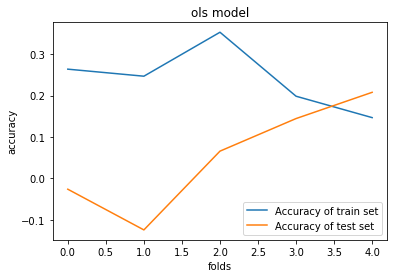

In [23]:
#Plotting the cross value scores for ols model on test data set and train data set

plt.title("ols model")
plt.xlabel("folds")
plt.ylabel("accuracy")

plt.plot(np.arange(len(ols_cross_val)),ols_cross_val, label ="Accuracy of train set")
plt.plot(np.arange(len(ols_cross_val_test)),ols_cross_val_test, label ="Accuracy of test set")
plt.legend()

We observe that the score of test set is initially lower than that of train set, but in the last fold it increases and is higher than the score of train set.  Also the scores are spread more for the test set.

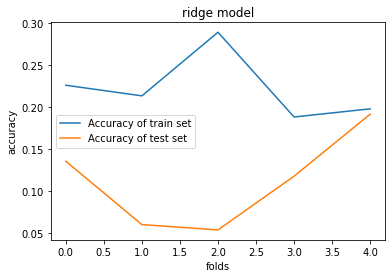

In [24]:
#Plotting the cross value scores for ridge model on test data set and train data set

plt.title("ridge model")
plt.xlabel("folds")
plt.ylabel("accuracy")

plt.plot(np.arange(len(ridge_cross_val)),ridge_cross_val, label ="Accuracy of train set")
plt.plot(np.arange(len(ridge_cross_val_test)),ridge_cross_val_test, label ="Accuracy of test set")
plt.legend()


We observe that the score of test set is lower than that of train set, but in the last fold it increases and is almost near the score of train set. 

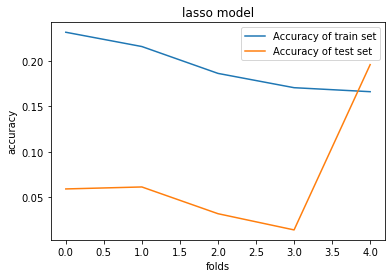

In [25]:
#Plotting the cross value scores for lasso model on test data set and train data set

plt.title("lasso model")
plt.xlabel("folds")
plt.ylabel("accuracy")

plt.plot(np.arange(len(lasso_cross_val)),lasso_cross_val, label ="Accuracy of train set")
plt.plot(np.arange(len(lasso_cross_val_test)),lasso_cross_val_test, label ="Accuracy of test set")
plt.legend()


We observe that the score of test set is lower than that of train set, but in the last fold  it increases and is slightly higher than the score of train set. 


In [26]:
print("OLS model-",ols_cross_val_test.mean())
print("Ridge model-",ridge_cross_val_test.mean())
print("Lasso model-",lasso_cross_val_test.mean())

OLS model- 0.05360360302305529
Ridge model- 0.11206831170810654
Lasso model- 0.07222696348895985


We observe that the scores on the test set is higher for Ridge Model when compared to the other models. Thus Ridge has better performance than the other 2 models. Also the scores are spread more for the OLS model when compared to the other 2.

## Exercise 2: Higher Order Polynomial Regression

### Task A: Prediction with high degree of polynomials

Creating degree 1 ploynomial and predicting the y values using Linear Regression - using the data set created in ex0

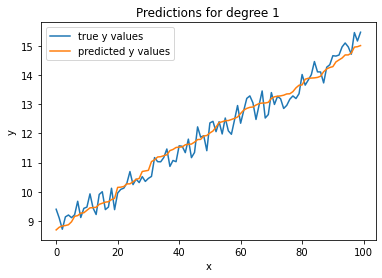

In [27]:
poly = PolynomialFeatures(1) #using sklearn
x_poly = poly.fit_transform(x_d1)
reg = LinearRegression().fit(x_poly, y_d1) # learning using linear regression and then predicting y
y_predicted = reg.predict(x_poly)

#Plotting the y values
plt.title("Predictions for degree 1")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(range(len(x_poly)),y_d1, label ="true y values")
plt.plot(range(len(x_poly)),y_predicted, label ="predicted y values")
plt.legend()


Creating degree 2 ploynomial and predicting the y values using Linear Regression. 

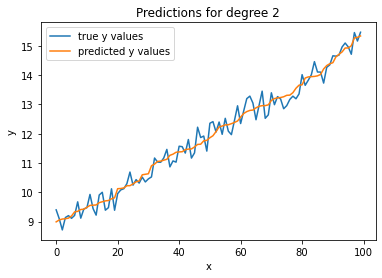

In [28]:
#Similar to the code above
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x_d1)
reg = LinearRegression().fit(x_poly, y_d1)
y_predicted = reg.predict(x_poly)

plt.title("Predictions for degree 2")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(range(len(x_poly)),y_d1, label ="true y values")
plt.plot(range(len(x_poly)),y_predicted, label ="predicted y values")
plt.legend()


Creating degree 7 ploynomial and predicting the y values using Linear Regression

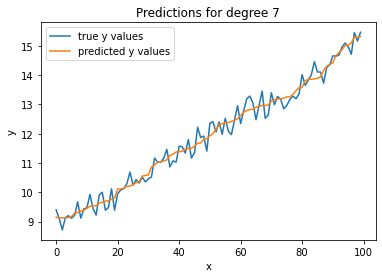

In [29]:
#Similar code to the one above
poly = PolynomialFeatures(7)
x_poly = poly.fit_transform(x_d1)
reg = LinearRegression().fit(x_poly, y_d1)
y_predicted = reg.predict(x_poly)

plt.title("Predictions for degree 7")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(range(len(x_poly)),y_d1, label ="true y values")
plt.plot(range(len(x_poly)),y_predicted, label ="predicted y values")
plt.legend()


Creating degree 10 ploynomial and predicting the y values using Linear Regression

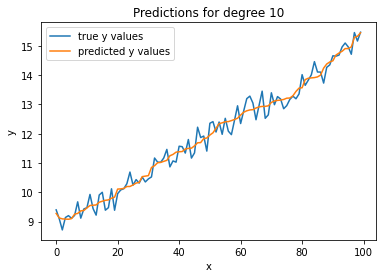

In [30]:
#Similar code

poly = PolynomialFeatures(10)
x_poly = poly.fit_transform(x_d1)
reg = LinearRegression().fit(x_poly, y_d1)
y_predicted = reg.predict(x_poly)

plt.title("Predictions for degree 10")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(range(len(x_poly)),y_d1, label ="true y values")
plt.plot(range(len(x_poly)),y_predicted, label ="predicted y values")
plt.legend()


Creating degree 16 ploynomial and predicting the y values using Linear Regression

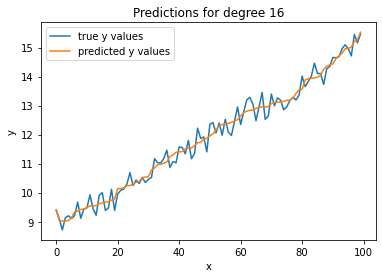

In [31]:
#Similar code
poly = PolynomialFeatures(16)
x_poly = poly.fit_transform(x_d1)
reg = LinearRegression().fit(x_poly, y_d1)
y_predicted = reg.predict(x_poly)

plt.title("Predictions for degree 16")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(range(len(x_poly)),y_d1, label ="true y values")
plt.plot(range(len(x_poly)),y_predicted, label ="predicted y values")
plt.legend()


Creating degree 100 ploynomial and predicting the y values using Linear Regression

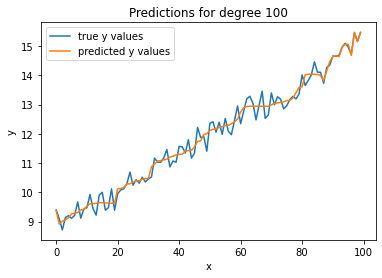

In [32]:
#Similar code
poly = PolynomialFeatures(100)
x_poly = poly.fit_transform(x_d1)
reg = LinearRegression().fit(x_poly, y_d1)
y_predicted = reg.predict(x_poly)

plt.title("Predictions for degree 100")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(range(len(x_poly)),y_d1, label ="true y values")
plt.plot(range(len(x_poly)),y_predicted, label ="predicted y values")
plt.legend()


We observe from the graphs for each polynomial degree that as the degree of the polynomial increases the difference between the predicted and true y values decreases. We can say that the model becomes overfitting with higher order polynomials.

### Task B: Effect of Regularization

Fixing the polynomial order and performing ridge regression for different lambda values using the data set created in ex0. After predicting the y values, they are plotted using matplotlib

Ridge regression performed for lambda= 0

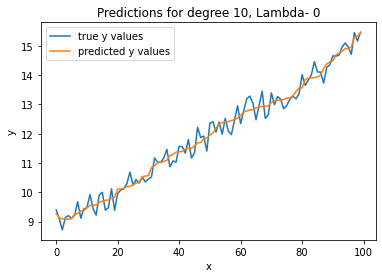

In [33]:
poly = PolynomialFeatures(10) # Fixing degree to 10
x_poly = poly.fit_transform(x_d1)

reg = Ridge(alpha=0).fit(x_poly, y_d1) # performing ridge regression for lambda = 0
y_predicted = reg.predict(x_poly) # predicting y values

#plotting the y values
plt.title("Predictions for degree 10, Lambda- 0")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(range(len(x_poly)),y_d1, label ="true y values")
plt.plot(range(len(x_poly)),y_predicted, label ="predicted y values")
plt.legend()


 Ridge regression performed for lambda= 10^-6 

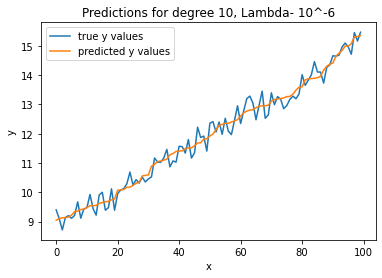

In [34]:
#Code similar to that done above

reg = Ridge(alpha= 10 **-6).fit(x_poly, y_d1)
y_predicted = reg.predict(x_poly)
plt.title("Predictions for degree 10, Lambda- 10^-6")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(range(len(x_poly)),y_d1, label ="true y values")
plt.plot(range(len(x_poly)),y_predicted, label ="predicted y values")
plt.legend()


 Ridge regression performed for lambda= 10^-2

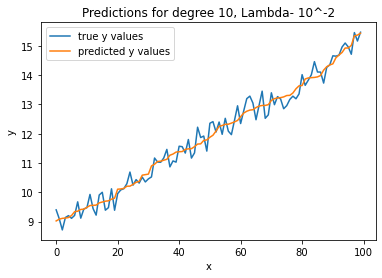

In [35]:
#Code similar to that done above

reg = Ridge(alpha= (10 **-2)).fit(x_poly, y_d1)
y_predicted = reg.predict(x_poly)
plt.title("Predictions for degree 10, Lambda- 10^-2")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(range(len(x_poly)),y_d1, label ="true y values")
plt.plot(range(len(x_poly)),y_predicted, label ="predicted y values")
plt.legend()

Ridge regression performed for lambda= 1

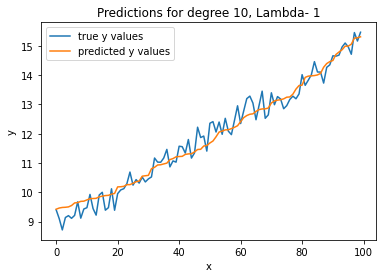

In [36]:

#Code similar to that done above
reg = Ridge(alpha= 1).fit(x_poly, y_d1)
y_predicted = reg.predict(x_poly)
plt.title("Predictions for degree 10, Lambda- 1")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(range(len(x_poly)),y_d1, label ="true y values")
plt.plot(range(len(x_poly)),y_predicted, label ="predicted y values")
plt.legend()

We observe that the predicted and true y values maintain almost the same difference for all of the regularisation hyper parameter. Thus the model is not overfitting.

## Exercise 3: Implementing Coordinate Descent

Implementing Coordinate Descent using the wine data set defined and preprocessed in ex0 and ex1. Beta values of each epoch is plotted. Here Beta values contain 11 values ( bias +10 features).

The algorithm of Coordinate Descent with and without Regularisation is as follows-

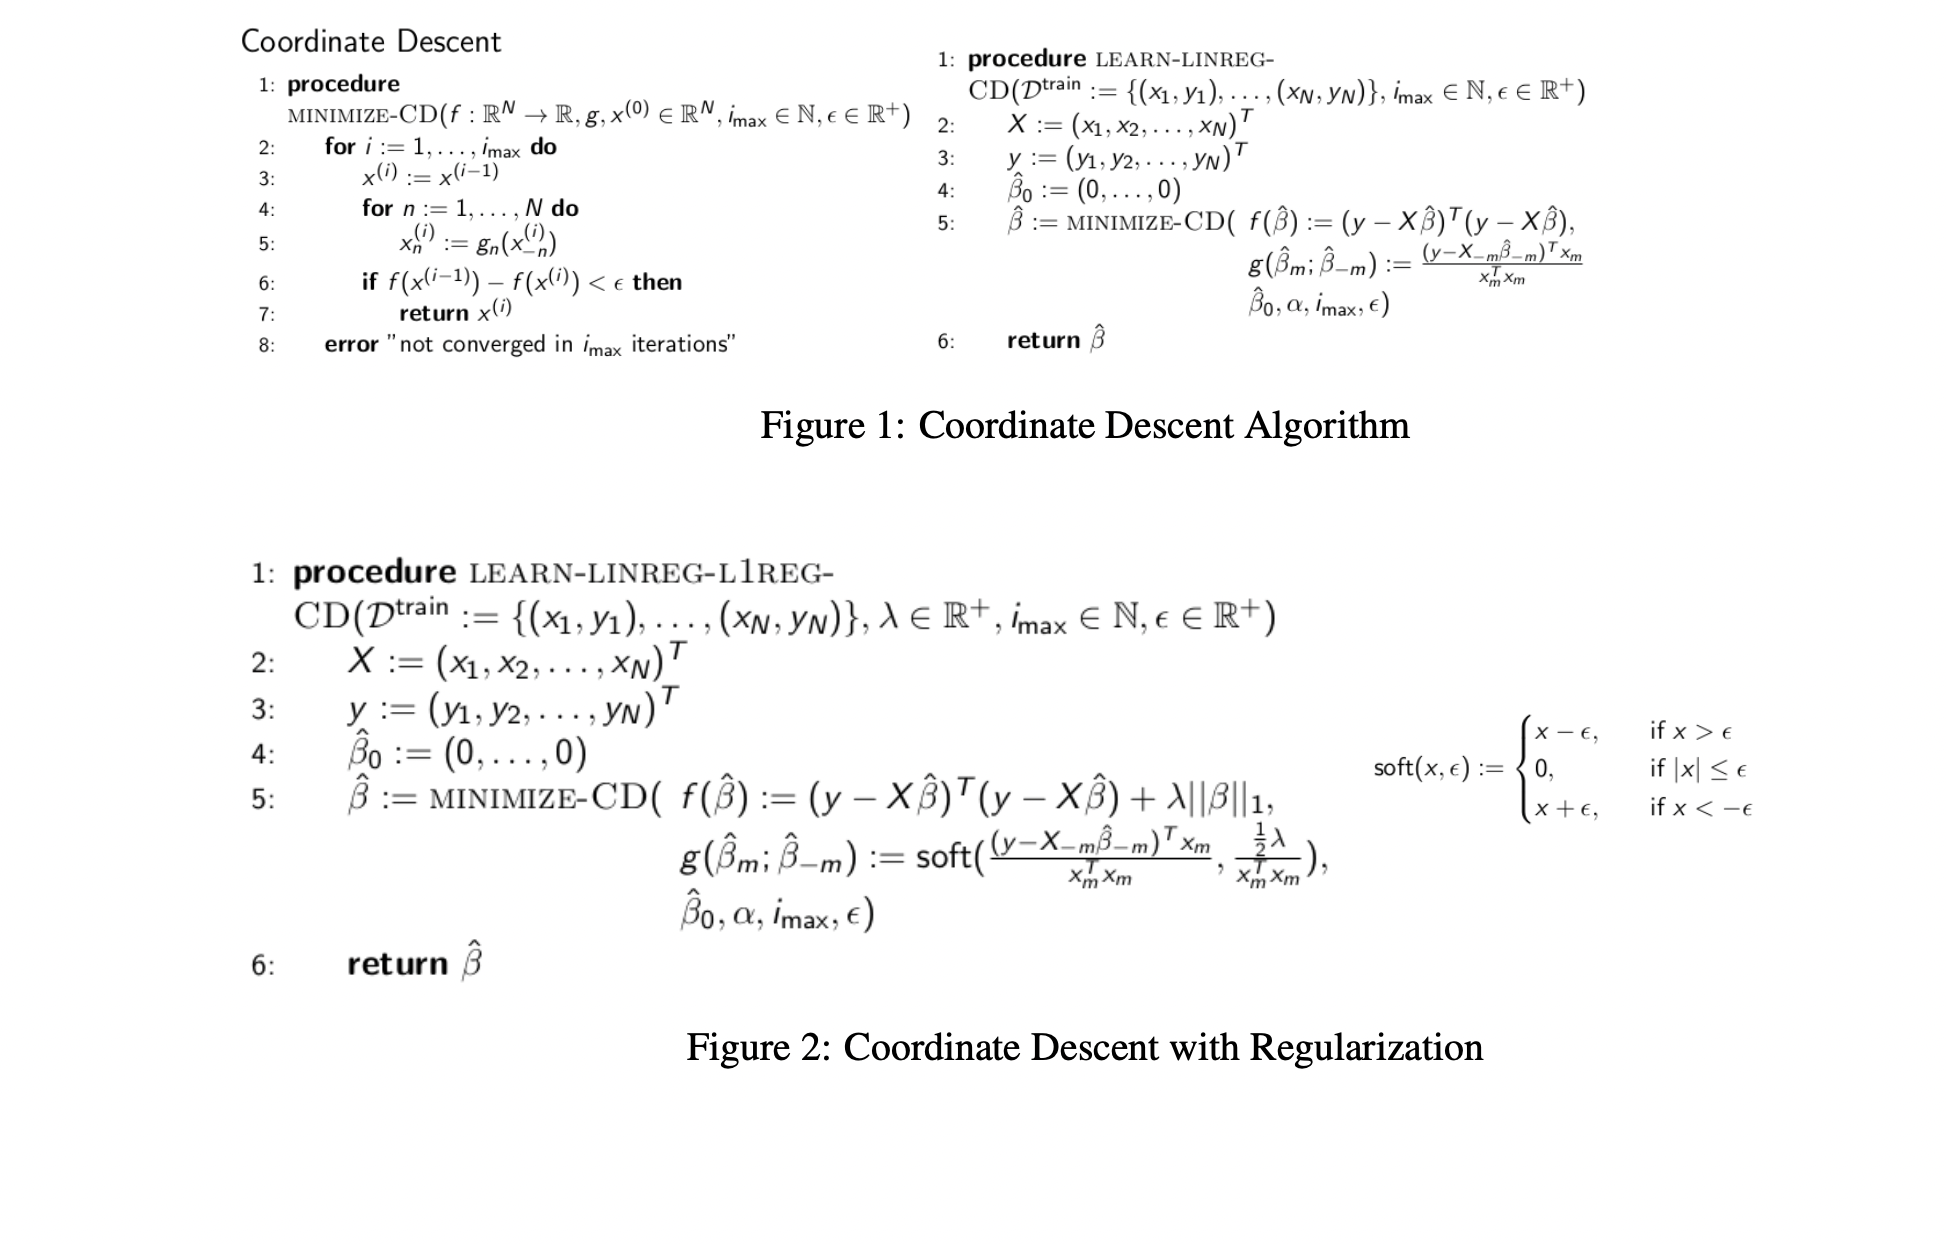

### Coordinate Descent without Regularization

In [37]:
def coordinate_descent(x_train,y_train,imax):
    x_train = np.hstack((np.ones((len(x_train),1)),x_train)) # adding stack of ones for bias
   
    beta_list =[]
    beta = np.zeros(len(x_train[1])).reshape(-1,1) # initializing beta array
    
    beta_list.append(beta)
    for i in range(imax):  # for each epoch
        
        for col in range(len(beta)): # for each feature
            
            xhat = np.delete(x_train, col, axis=1)  # delete one column of the x set
            betahat = np.delete(beta, col, axis=0)  # delete the same column or feature from the beta array
            pdt = np.dot(xhat,betahat)  # their product is found
            
            x_square = np.dot(x_train[:,col].T,x_train[:,col])  # the deleted x col is squared
            #print(np.dot((y_train - pdt).T, x_train[:,col])/ x_square)
            
            beta[col] = np.dot((y_train - pdt).T, x_train[:,col])/ x_square # beta value of that column is found
            
        beta_list.append(np.array(beta)) # appending beta values
    return beta_list

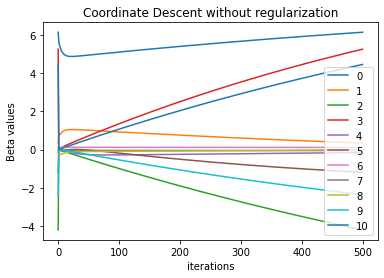

In [38]:
beta_list = coordinate_descent(x_train,y_train,500) # calling function
beta_list = np.array(beta_list) # converting to array for plotting
plt.title("Coordinate Descent without regularization")
plt.xlabel("iterations")
plt.ylabel("Beta values")

for i in range(11):
    
    plt.plot(np.arange(501),beta_list[:,i], label =i) # beta values of each iteration is plotted

plt.legend()



We observe that the beta values change for each iteration.3 beta values are near to zero but the rest diverges. They range from -4 to 6. 

### Coordinate Descent with L1 Regularization (Lasso)


In [39]:
def coordinate_descent_reg(x_train,y_train,imax,lamba):
    x_train = np.hstack((np.ones((len(x_train),1)),x_train)) # adding ones for bias
   
    beta_list =[]
    beta = np.zeros(len(x_train[1])).reshape(-1,1) # initializing beta
    
    beta_list.append(beta)
    for i in range(imax): # For each epoch
        
        for col in range(len(beta)): # for each feature in x
            xhat = np.delete(x_train, col, axis=1) # delete one feature column from x
            betahat = np.delete(beta, col, axis=0) # delete same feature column from beta
            pdt = np.dot(xhat,betahat) # finding product
            x_square = np.dot(x_train[:,col].T,x_train[:,col])   # finding square of the deleted feature column in x
            
            beta_new= np.dot((y_train - pdt).T, x_train[:,col])/ x_square # finding the new term
            
            reg = (lamba/2) / x_square # regularisation term for L1 acc to algorithm
            
            if( beta_new > reg):  # from the algorithm new beta is found as
                beta[col] = beta_new - reg
            elif ( beta_new < - reg ):
                beta[col] = beta_new + reg
            elif (abs(beta_new)<= reg ):
                beta[col] = 0
            
        beta_list.append(np.array(beta)) # appending the beta values
    return beta_list

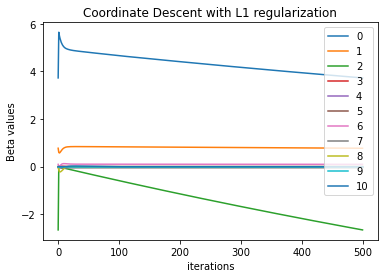

In [40]:
beta_list_reg = coordinate_descent_reg(x_train,y_train,500,5) #calling the function
beta_list_reg = np.array(beta_list_reg) # converting to array for plotting

#Plotting the beta values for each iteration
plt.title("Coordinate Descent with L1 regularization")
plt.xlabel("iterations")
plt.ylabel("Beta values")

for i in range(11):
    
    plt.plot(np.arange(501),beta_list_reg[:,i], label =i) # loop for each iteration

plt.legend()

We observe that most of the beta values are constant and remain equal to 0. Only 3 beta values are diverging to non zero values. From this we can infer that due to regularisation, to avoid overfitting features which do not have high correlation are removed.

### Comparison Plot

Plotting the final beta values of coordinate descent with and without regularisation.

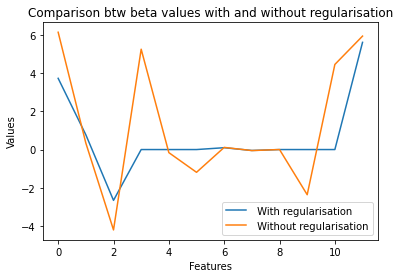

In [41]:
plt.title("Comparison btw beta values with and without regularisation")
plt.xlabel("Features")
plt.ylabel("Values")

plt.plot(np.arange(12),beta_list_reg[len(beta_list_reg)-1], label =" With regularisation")
plt.plot(np.arange(12),beta_list[len(beta_list_reg)-1], label =" Without regularisation")
plt.legend()



We observe that more beta values and equal to zero after regularisation.Thus only required features are considered in Regualrised model. This helps in decreasing the overfitting of the model. Also the value of the non zero beta values are also lesser after regularisation is applied. 

### References

https://scikit-learn.org/
https://numpy.org/
https://www.askpython.com/python/examples/k-fold-cross-validation
https://stackoverflow.com/questions/51977418/coordinate-descent-in-python
https://sandipanweb.wordpress.com/2017/05/04/implementing-lasso-regression-with-coordinate-descent-and-the-sub-gradient-of-the-l1-penalty-with-soft-thresholding/